<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
<p></p>
</font>
<p></p>
<font>
<br>
Modern Information Retrieval course
<br>
lecturer: Dr. Soleymani
</font>
<p></p>
<br>
<font>
<b>
project second phase
</b>
</font>
<br>
<br>
<br>
<font>
<b>Amir Hossein Rahmati</b>
<br>
<font>
Sharif University of Technology
<br>
Computer Engineering department
<br>
<br>
</font>
</div>
</font>
</div>


<div dir="ltr">
<font size=4 >
system based on machine learning use different methods of machine learning in different parts. Classification and clustering are two important tasks in these systems. In this exercise, we will implement these tasks using different methods and implement new features for the scientific article retrieval system. You can download the data of this phase from
<a href="https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download">this link</a>.
</font>
</div>

<div>
<font size=6>
    <h1>
    Classification using Naive Bayes
    </h1>
    <p></p>
    <p></p>
</font>
<font  size=3>
In this part, you will classify documents. To do this, first create a vector for each document based on the total number of words and then implement the NaiveBaise classifier from scratch and classify the documents.
</font>
</div>

<div>
<font  size=5>
    <h2>
    <b>
    Downloading the dataset and Visualizing
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
In this part, download the following dataset from kaggle and see its features.
</font>
</div>

In [ ]:
# import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
# import torch
# from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('./arxiv_data.csv')
df

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"
...,...,...,...
51769,Hierarchically-coupled hidden Markov models fo...,We address the problem of analyzing sets of no...,"['stat.ML', 'physics.bio-ph', 'q-bio.QM']"
51770,Blinking Molecule Tracking,We discuss a method for tracking individual mo...,"['cs.CV', 'cs.DM']"
51771,Towards a Mathematical Foundation of Immunolog...,We attempt to set a mathematical foundation of...,"['stat.ML', 'cs.LG', 'q-bio.GN']"
51772,A Semi-Automatic Graph-Based Approach for Dete...,Diffusion Tensor Imaging (DTI) allows estimati...,['cs.CV']


In [ ]:
# replace Nan with empty string
df = df.fillna("")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51774 entries, 0 to 51773
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     51774 non-null  object
 1   summaries  51774 non-null  object
 2   terms      51774 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


<div>
<font size=5>
    <h2>
    <b>
    Reducing the size of the dataset
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    In this part, you can reduce the size of the dataset as you wish so that NaiveBayes can perform better.
    Reducing the size of the dataset can increase the speed and memory required.
</font>
</div>

In [ ]:
# reduce size of dataset by choosing some random rows
df = df.sample(n=10000, random_state=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 931 to 8449
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     10000 non-null  object
 1   summaries  10000 non-null  object
 2   terms      10000 non-null  object
dtypes: object(3)
memory usage: 312.5+ KB


<div >
<font size=5>
    <h2>
    <b>
    Preprocessing
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
    In this part, you can preprocess the dataset using the following function or the functions you defined in phase 1.
    The data you are working with in this section have multiple labels. But for this section, we only consider the first label of each article and look at the data as a single label.
</font>
</div>

In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return ' '.join(normalized_tokens)

In [ ]:
# use preprocess_text function for the title and summary columns
df['titles'] = df['titles'].apply(preprocess_text)
df['summaries'] = df['summaries'].apply(preprocess_text)

In [ ]:
# use only first label from the list of labels in column 'terms'
df['terms'] = df['terms'].apply(lambda x: x.split(',')[0].split('[')[1].split(']')[0])

In [ ]:
df

,titles,summaries,terms
931,self-learning detect segment cysts lung ct ima...,image segmentation fundamental problem medical...,'cs.CV'
40820,online trajectory recovery offline handwritten...,general straightforward render offline handwri...,'cs.CV'
8930,spotpatch parameter-efficient transfer learnin...,deep learning based object detectors commonly ...,'cs.CV'
46601,understanding role importance weighting deep l...,recent paper byrd lipton 2019 based empirical ...,'cs.LG'
13852,towards differentiable resampling,resampling key component sample-based recursiv...,'cs.LG'
...,...,...,...
35901,ucb exploration via q-ensembles,show ensemble q^* -functions leveraged effecti...,'cs.LG'
10542,sparsifying update step graph neural networks,message-passing neural networks mpnns prominen...,'cs.LG'
43910,sarn relational reasoning sequential attention,paper proposes attention module augmented rela...,'cs.LG'
15105,swagan style-based wavelet-driven generative m...,recent years considerable progress made visual...,'cs.CV'


<div>
<font size=5>
    <h2>
    <b>
    Making data ready to train and test
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
    In this part, you can prepare the data needed for NaiveBayes by creating a doc-word matrix. In this matrix, each row represents the document ID and each column represents a word in your entire vocabulary.
    You can also use CountVectorizer.
</font>
</div>

In [ ]:
# merge title and summary columns
df['text'] = df['titles'] + df['summaries']

In [ ]:
#TODO
from sklearn.feature_extraction.text import CountVectorizer

# build the doc-word matrix using countVectorizer
vectorizer = CountVectorizer()
doc_word = vectorizer.fit_transform(df['text'])
print(doc_word.shape)
print(doc_word.toarray())

(10000, 36479)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# make the labels as integers in a y list
y = df['terms'].tolist()
# find the unique labels
unique_labels = list(set(y))
print(unique_labels)
# map the labels to the numbers from 1 to the labels count
y = [unique_labels.index(i) for i in y]

["'cs.CV'", "'stat.ML'", "'cs.LG'"]


In [ ]:
# split data to the train and test sets
X_train, X_test, y_train, y_test = train_test_split(doc_word, y, test_size=0.2, random_state=1)

<div>
<font size=5>
    <h2>
    <b>
    classification using NaiveBayes
    </b>
    </h2>
    In this section, complete the following class to implement the NaiveBayes classifier <u><b>from scratch</b></u>.
</font>
</div>

In [ ]:
class NaiveBayes():
    def __init__(self, alpha=1.0):
        self.prior = None
        self.word_counts = None
        self.lk_word = None
        self.alpha = alpha
        
    def fit(self, x, y):
        '''
        Fit the features and the labels
        Calculate prior, word_counts and lk_word
        
        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count 
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc
            
        Returns
        -------
        self
            Returns self as a classifier
        '''

        # compute priors
        # count of each class
        class_count = np.bincount(y)
        # total count of all classes
        total_count = np.sum(class_count)
        # prior of each class = log (count of each class / total count of all classes)
        self.prior = np.log(class_count / total_count)
        # compute word_counts
        # count of each word in each class
        self.word_counts = np.zeros((len(class_count), x.shape[1]))

        # split docs based on their class
        for i in range(len(class_count)):
            # find all indexes of docs with class i
            idx = np.where(y == i)
            # get all docs with class i
            docs = x[idx]
            # sum all docs with class i
            count = np.sum(docs, axis=0)
            # add count of each word in each class to word_counts
            self.word_counts[i] = count

        # compute lk_word
        # likelihood of each word in each class = log (count of each word in each class / total count of all words in each class)
        self.lk_word = np.log((self.word_counts + self.alpha) / (np.sum(self.word_counts, axis=1).reshape(-1, 1) + self.alpha * x.shape[1]))

        return self

    def predict(self, x):
        '''
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count 
            of docs and n is vocabulary size
        
        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        '''
        # compute posterior = prior + sum of likelihood of each word in each class
        posterior = self.prior + np.dot(x, self.lk_word.T)

        # arg max of posterior
        return np.argmax(posterior, axis=1)
        

In [ ]:
# use your classifier to fit on the training data
# then try to predict classes of test data

# create an instance of the NaiveBayes class
nb = NaiveBayes()
# fit the training data
nb.fit(X_train.toarray(), np.array(y_train))
# predict the test data
y_pred = nb.predict(X_test.toarray())

<div>
<font size=5>
    <h2>
    <b>
    Evaluate trained model
    </b>
    </h2>
    translated to English:
    In this section, calculate precision, recall, F1 score in macro and micro mode and accuracy of the model using sklearn.
</font>
</div>

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

Accuracy: 0.868500


In [ ]:
# calculate precision score with micro and macro approches
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
print('Precision micro: %f' % precision_micro)
print('Precision macro: %f' % precision_macro)

Precision micro: 0.868500
Precision macro: 0.744894


In [ ]:
# calculate recall score with micro and macro approches
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
print('Recall micro: %f' % recall_micro)
print('Recall macro: %f' % recall_macro)

Recall micro: 0.868500
Recall macro: 0.638310


In [ ]:
# calculate f1 score with micro and macro approches
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
print('F1 micro: %f' % f1_micro)
print('F1 macro: %f' % f1_macro)

F1 micro: 0.868500
F1 macro: 0.641569


<div>
<font size=4>
In the following section, obtain the roc curve of this non-binary classification and analyze it briefly.
</div>
</font>

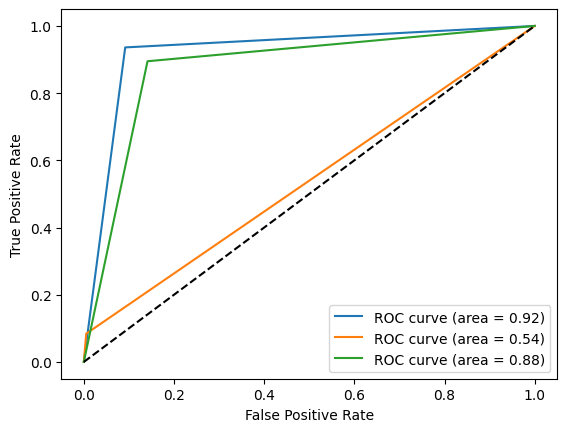

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# first binerize the labels
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes= np.arange(0, len(unique_labels)))
y_pred_bin = label_binarize(y_pred, classes= np.arange(0, len(unique_labels)))

# calculate roc curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(unique_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_bin[:, i])

# plot roc curve for each class
plt.figure()
for i in range(len(unique_labels)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()



as it is shown in the plot , the auc is good for the labels 1 and 3 but it isn't good for the label 2.


<div >
<font size=4>
In this section, draw the confusion matrix without using sklearn and using matplotlib and seaborn.
</font>
</div>

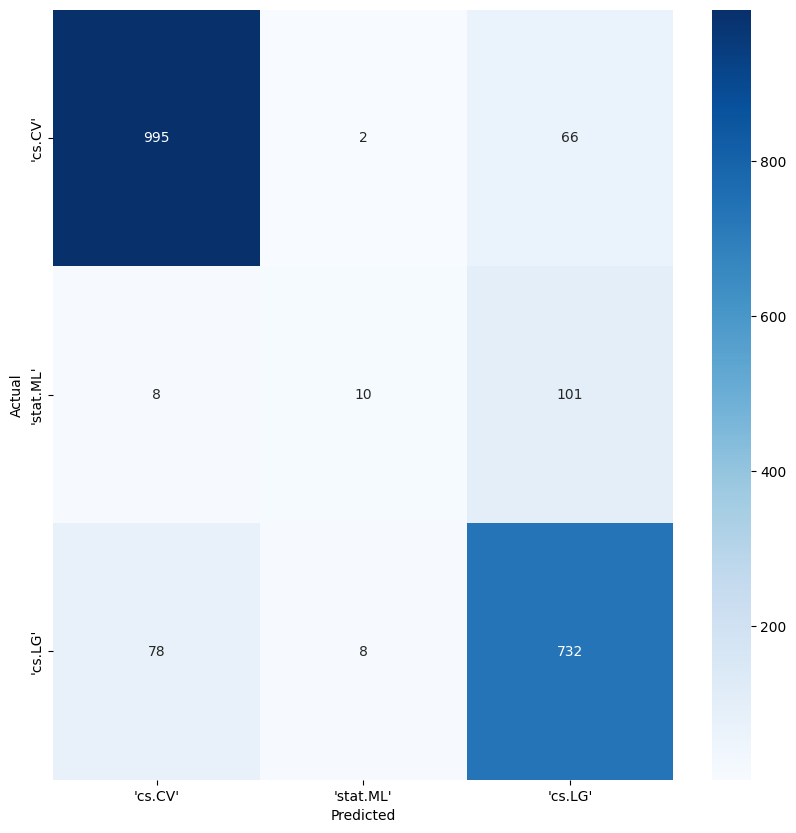

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#TODO confusion matrix without importing confusion_matrix from sklearn.metrics

# compute confusion matrix
CM = np.zeros((len(unique_labels), len(unique_labels)))
for i in range(len(y_test)):
    CM[y_test[i], y_pred[i]] += 1

# plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(CM, annot=True, fmt='g', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<div>
<font size=5>
    <h1>
    <b>
    Classification using Neural Networks
    </b>
    </h1>
    <p></p>
    <p></p>
</font>
<font size=3>
    You have a dataset of scientific articles, each with an abstract and its related topic. The goal is to build a neural network model that can predict the topic based on the abstract and title of the scientific article.

</font>
</div>
   

<div>
<font size=5>
    <h2>
    <b>Data</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    The data you are working with in this section have multiple labels. But for this section, we only consider the first label of each article and look at the data as a single label.
</font>
</div>
   

## Requirements

In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393162 sha256=067d84958b95cf10dcff65fce6b0f032f8d0bb9fa104ee8761ff26a3d709a23b
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
# You may not use all of these imports, but they are here to help you get started
# you can add cells if you needed

import nltk
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import seaborn as sns

import fasttext
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from time import time
from IPython.display import display
import copy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



<div>
<font size=5>
    <h2>
    <b>
Read and preprocess data
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
First, load the data. Clean it or, in other words, perform appropriate EDA so that the data does not have null data or the like. Perform the necessary preprocessing on the data that you are familiar with in the previous phase.
Consider the first label of each article as the category of that article from the dataset.
</font>
</div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read data
df = pd.read_csv('./drive/MyDrive/arxiv_data.csv')
# reduce size of dataset by choosing some random rows
df = df.sample(n=25000, random_state=1)
# save the reduced dataset
df.to_csv('./drive/MyDrive/arxiv_data_reduced.csv', index=False)


In [ ]:
# load the reduced dataset
df = pd.read_csv('./drive/MyDrive/arxiv_data_reduced.csv')

In [ ]:
# perform data cleaning and eda (you can add cells here)
df

,titles,summaries,terms
0,Self-Learning to Detect and Segment Cysts in L...,Image segmentation is a fundamental problem in...,['cs.CV']
1,Online trajectory recovery from offline handwr...,"In general, it is straightforward to render an...","['cs.CV', 'cs.LG']"
2,SpotPatch: Parameter-Efficient Transfer Learni...,Deep learning based object detectors are commo...,['cs.CV']
3,Understanding the role of importance weighting...,"The recent paper by Byrd & Lipton (2019), base...",['cs.LG']
4,Towards Differentiable Resampling,Resampling is a key component of sample-based ...,"['cs.LG', 'cs.RO', 'stat.ML']"
...,...,...,...
24995,Fingerprint Spoof Detection: Temporal Analysis...,We utilize the dynamics involved in the imagin...,['cs.CV']
24996,Why do deep convolutional networks generalize ...,Convolutional Neural Networks (CNNs) are commo...,['cs.CV']
24997,Vision-Based Fall Event Detection in Complex B...,"Fall event detection, as one of the greatest r...",['cs.CV']
24998,Channel-wise Knowledge Distillation for Dense ...,Knowledge distillation (KD) has been proven to...,['cs.CV']


In [ ]:
# replace Nan with empty string
df = df.fillna("")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     25000 non-null  object
 1   summaries  25000 non-null  object
 2   terms      25000 non-null  object
dtypes: object(3)
memory usage: 586.1+ KB


In [ ]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return ' '.join(normalized_tokens)


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>

</font>
</div>

In [ ]:
# preprocess text
df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
preprocessed_total = df['preprocessed_abstract'] + df['preprocessed_title']
# use only first label from the list of labels in column 'terms'
df['terms'] = df['terms'].apply(lambda x: x.split(',')[0].split('[')[1].split(']')[0])


<div >
<font size=5>
    <h2>
    <b>
    Vectorize data
    </b>
    </h2>
    <p></p>
    <p></p>

</font>
<font size=3>    
    In this section, we use fasttext to get an initial embedding for each article. Train a fasttext model using the data we have to provide a 100-dimensional embedding for each token. In the next step, calculate the weighted average of fasttext embeddings for input tokens (abstract + title) based on their tfidif and reach the final text embedding. In fact, in simpler terms, based on the weighted average, which our weights are tfidf tokens, we reach the final text embedding based on fasttext.
    </font>
</div>

In [ ]:
class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        # todo
        # unsupervised train
        self.model = fasttext.train_unsupervised(texts, model=self.method)


    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        # todo
        query_embed = np.zeros((1, 100))
        query = self.preprocessor(query)
        count = 0
        for word in query.split():
            try:
                idf = tf_idf_vectorizer.idf_[tf_idf_vectorizer.vocabulary_[word]]
                count += idf
                query_embed += self.model.get_word_vector(word) * idf
            except:
                pass
        query_embed /= count

        return query_embed

    def save_FastText_model(self, path='./drive/MyDrive/FastText_model.bin'):
        self.model.save_model(path)
  
    def load_FastText_model(self, path="./drive/MyDrive/FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [ ]:
# make preprocessed_total a file with name preprocessed_total.txt
# with open('preprocessed_total.txt', 'w') as f:
#     for item in preprocessed_total:
#         f.write("%s\n" % item)
FastText_model = FastText(preprocessor=preprocess_text)
# FastText_model.prepare('preprocessed_total.txt', mode='train', save=True)
FastText_model.prepare(preprocessed_total, mode='load')

In [ ]:
text = 'covid'

FastText_model.model.get_nearest_neighbors(text)

[(0.890330970287323, 'covid19'),
 (0.8828160166740417, 'covid-19'),
 (0.769316554069519, 'pandemic'),
 (0.7453219890594482, 'covid-related'),
 (0.7351051568984985, 'pandemics'),
 (0.6935170888900757, 'infected'),
 (0.6897122859954834, 'infection'),
 (0.6803584694862366, 'infections'),
 (0.6782852411270142, 'infectious'),
 (0.67699134349823, 'infective')]

In [ ]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        # .fittransform.
        # todo
        self.vectorizer.fit_transform(data)


In [ ]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(preprocessed_total)

In [ ]:
text =  "backpropagation is good"
# print(TF_IDF_model.vectorizer.transform([' '.join(text)]))
print(FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer))

[[ 9.08386261e-02  2.44086572e-01  1.15956032e-01  1.04573508e-01
   3.40119724e-01 -2.33656877e-01 -2.84980511e-01  3.85936075e-01
  -5.83842652e-02 -9.93000177e-02  1.65017765e-01 -5.93308951e-03
   4.64010191e-02  8.97634165e-02  4.52319705e-02 -1.01437717e-02
   1.31673943e-02  1.56333516e-01 -3.25449554e-02  1.11919110e-01
   5.30254653e-01  7.34814517e-02 -5.06020026e-02 -3.83264672e-01
  -9.74179318e-02 -5.37461833e-01 -5.98725144e-02 -8.38764266e-02
  -7.61163080e-02 -4.04241353e-01  2.15436923e-01 -4.96560197e-02
  -1.42163960e-01  4.02898847e-01  2.47529932e-01  8.13837399e-02
   1.00555476e-01 -1.50833408e-01  1.30816645e-02 -1.24518624e-01
   2.07915040e-02  1.28906892e-01 -2.96523493e-01  1.96395893e-01
  -9.57704027e-02 -3.07523363e-02  4.97005894e-01 -1.67108259e-01
   2.73006946e-04  1.37824574e-02 -4.18045253e-01 -1.23040730e-01
   2.29145852e-01  3.22175110e-01 -1.32023395e-01  4.63947649e-02
  -2.12129817e-02  2.98093735e-01 -2.36908021e-01 -1.49955131e-01
   3.74140


<div>
<font size=3>
    Now, using the model you have written, create the input data for the neural network.
    In other words, get the corresponding embedding for each article.
    Also, convert the labels to numbers so that they are understandable for the neural network.
</font>
</div>

In [ ]:
# todo
embeddings = np.zeros((len(preprocessed_total), 100))
for i in range(len(preprocessed_total)):
    embeddings[i] = FastText_model.get_query_embedding(preprocessed_total[i], TF_IDF_model.vectorizer)


In [ ]:
# save the embeddings
np.save('./drive/MyDrive/embeddings.npy', embeddings)

In [ ]:
# load the embeddings
embeddings = np.load('./drive/MyDrive/embeddings.npy')


In [ ]:
print(embeddings.shape)

(25000, 100)



<div>
<font size=5>
    <h2>
    <b>
    Prepare data for model
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
        In this section, create the input dataset for the neural network.
        Also, divide the data into train, test, and validation parts.
        Consider 80% of the data for training
        10% for validation
        and 10% for testing.
        Finally, create the relevant dataloaders.
    </font>
</div>

In [ ]:
# make the labels as integers in a y list
y = df['terms'].tolist()
# find the unique labels
unique_labels = list(set(y))
print(unique_labels)
# map the labels to the numbers from 1 to the labels count
y = [unique_labels.index(i) for i in y]
y = np.array(y)

# count labels of each class
from collections import Counter
Counter(y)
print(Counter(y))

["'cs.LG'", "'cs.CV'", "'stat.ML'"]
Counter({1: 13555, 0: 10002, 2: 1443})


In [ ]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.2, random_state=42)
# split train to the train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(18000, 100)
(18000,)


In [ ]:
class PapersDataSet(Dataset):
    def __init__(self, embeddings: list, labels: list):
        self.embeddings = embeddings
        self.labels = labels
        
    def __len__(self):
        # todo
        return len(self.embeddings)

    def __getitem__(self, i):
        # todo
        return self.embeddings[i], self.labels[i]

In [ ]:
# todo calculate the labels
labels = y

In [ ]:
# todo split the data into train, val, test and create dataloaders
train_data_set = PapersDataSet(X_train, y_train)
val_data_set = PapersDataSet(X_val, y_val)
test_data_set = PapersDataSet(X_test, y_test)

train_loader = DataLoader(train_data_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data_set, batch_size=len(test_data_set), shuffle=True)


<div >
<font size=5>
    <h2>
    <b>
    Build model
    </b>
    <p></p>
    <p></p>
    </h2>
</font>
<font face="XB Zar" size=3>
    In this section, define your neural network model.
    <font>
</div>

In [ ]:
class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=3):
        # todo
        super(ClassifierModel, self).__init__()
        # use batchNorm layer at first
        self.layers = nn.Sequential(
            nn.BatchNorm1d(in_features),
            nn.Linear(in_features, 64),
            nn.GELU(),
            nn.Linear(64, 32),
            nn.GELU(),
            nn.Linear(32,num_classes)
         )
    def forward(self, x):
        # todo
        return self.layers(x)



<div>
<font size=5>
    <h2>
    <b>
    Train model
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    In this section, train your model using the training and validation data.
    Save the required information such as train and validation losses so that you can evaluate your model's learning using the graph in the next step.
</font>
</div>

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)

In [ ]:
# todo define the loss function and the optimizer. We suggest using Adam optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate , weight_decay=0.0001)

In [ ]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
num_epochs = 25

train_loss_arr, val_loss_arr = [], []
train_f1_macro_scores , val_f1_macro_scores = [] , []

best_model = None
best_f1 = 0.0

for epoch in range(num_epochs):
    train_loss = 0.0
    n = 0
    f1_s = 0
    model.train()
    with tqdm(train_loader, unit='batch') as torch_epoch:
        for x, y in torch_epoch:
            x = x.to(device)
            x = x.type(torch.float32)
            y = y.to(device)
            # going forward and calculate loss
            out = model(x)
            loss = criterion(out, y)
            train_loss += loss.item()
            n += 1
            # going backward and update parameters
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # calculate accuracy  
            predicted = torch.argmax(out, dim=1)
            f1_s += f1_score(y.cpu(), predicted.cpu(), average='macro')
            torch_epoch.set_description(f'Train {epoch} | Loss:{train_loss/n:.2e} | F1-Score: {f1_s/n:.2f}|')
        train_f1_macro_scores.append(f1_s/n)

    train_loss_arr.append(train_loss/n)


    # validate model
    val_loss = 0.0
    n = 0
    f1_s = 0
    model.eval()
    with tqdm(val_loader, unit='batch') as torch_epoch:
        for x, y in torch_epoch:
            x = x.to(device)
            x = x.type(torch.float32)
            y = y.to(device)
            # going forward and calculate loss
            out = model(x)
            loss = criterion(out, y)
            val_loss += loss.item()
            n += 1
            # calculate accuracy  
            predicted = torch.argmax(out, dim=1)
            f1_s += f1_score(y.cpu(), predicted.cpu(), average='macro')
            torch_epoch.set_description(f'Val {epoch} | Loss:{val_loss/n:.2e} | F1-Score: {f1_s/n:.2f}|')
        if (f1_s/n > best_f1):
            best_f1 = f1_s/n
            # copy the model to best model
            best_model = copy.deepcopy(model)
        val_f1_macro_scores.append(f1_s/n)
    
    val_loss_arr.append(val_loss/n)
    
    print(f'----------------------------[Epoch{epoch} finished!]----------------------------')

Train 0 | Loss:4.41e-01 | F1-Score: 0.59|: 100%|██████████| 282/282 [00:03<00:00, 91.94batch/s]
Val 0 | Loss:3.07e-01 | F1-Score: 0.65|: 100%|██████████| 32/32 [00:00<00:00, 122.20batch/s]


----------------------------[Epoch0 finished!]----------------------------


Train 1 | Loss:3.49e-01 | F1-Score: 0.64|: 100%|██████████| 282/282 [00:02<00:00, 94.55batch/s]
Val 1 | Loss:3.00e-01 | F1-Score: 0.65|: 100%|██████████| 32/32 [00:00<00:00, 113.05batch/s]


----------------------------[Epoch1 finished!]----------------------------


Train 2 | Loss:3.38e-01 | F1-Score: 0.66|: 100%|██████████| 282/282 [00:02<00:00, 112.96batch/s]
Val 2 | Loss:2.97e-01 | F1-Score: 0.64|: 100%|██████████| 32/32 [00:00<00:00, 139.74batch/s]


----------------------------[Epoch2 finished!]----------------------------


Train 3 | Loss:3.23e-01 | F1-Score: 0.66|: 100%|██████████| 282/282 [00:02<00:00, 114.50batch/s]
Val 3 | Loss:2.94e-01 | F1-Score: 0.72|: 100%|██████████| 32/32 [00:00<00:00, 155.14batch/s]


----------------------------[Epoch3 finished!]----------------------------


Train 4 | Loss:3.19e-01 | F1-Score: 0.68|: 100%|██████████| 282/282 [00:02<00:00, 114.84batch/s]
Val 4 | Loss:2.98e-01 | F1-Score: 0.73|: 100%|██████████| 32/32 [00:00<00:00, 154.58batch/s]


----------------------------[Epoch4 finished!]----------------------------


Train 5 | Loss:3.07e-01 | F1-Score: 0.69|: 100%|██████████| 282/282 [00:02<00:00, 112.79batch/s]
Val 5 | Loss:2.98e-01 | F1-Score: 0.71|: 100%|██████████| 32/32 [00:00<00:00, 129.51batch/s]


----------------------------[Epoch5 finished!]----------------------------


Train 6 | Loss:3.03e-01 | F1-Score: 0.69|: 100%|██████████| 282/282 [00:02<00:00, 102.43batch/s]
Val 6 | Loss:2.93e-01 | F1-Score: 0.72|: 100%|██████████| 32/32 [00:00<00:00, 121.95batch/s]


----------------------------[Epoch6 finished!]----------------------------


Train 7 | Loss:2.91e-01 | F1-Score: 0.71|: 100%|██████████| 282/282 [00:03<00:00, 91.51batch/s]
Val 7 | Loss:2.96e-01 | F1-Score: 0.71|: 100%|██████████| 32/32 [00:00<00:00, 153.51batch/s]


----------------------------[Epoch7 finished!]----------------------------


Train 8 | Loss:2.84e-01 | F1-Score: 0.72|: 100%|██████████| 282/282 [00:02<00:00, 115.09batch/s]
Val 8 | Loss:2.94e-01 | F1-Score: 0.70|: 100%|██████████| 32/32 [00:00<00:00, 150.39batch/s]


----------------------------[Epoch8 finished!]----------------------------


Train 9 | Loss:2.73e-01 | F1-Score: 0.72|: 100%|██████████| 282/282 [00:02<00:00, 118.07batch/s]
Val 9 | Loss:3.00e-01 | F1-Score: 0.68|: 100%|██████████| 32/32 [00:00<00:00, 149.12batch/s]


----------------------------[Epoch9 finished!]----------------------------


Train 10 | Loss:2.69e-01 | F1-Score: 0.73|: 100%|██████████| 282/282 [00:02<00:00, 116.10batch/s]
Val 10 | Loss:3.12e-01 | F1-Score: 0.70|: 100%|██████████| 32/32 [00:00<00:00, 137.10batch/s]


----------------------------[Epoch10 finished!]----------------------------


Train 11 | Loss:2.59e-01 | F1-Score: 0.74|: 100%|██████████| 282/282 [00:02<00:00, 108.52batch/s]
Val 11 | Loss:3.14e-01 | F1-Score: 0.71|: 100%|██████████| 32/32 [00:00<00:00, 129.82batch/s]


----------------------------[Epoch11 finished!]----------------------------


Train 12 | Loss:2.50e-01 | F1-Score: 0.76|: 100%|██████████| 282/282 [00:03<00:00, 92.55batch/s]
Val 12 | Loss:3.18e-01 | F1-Score: 0.72|: 100%|██████████| 32/32 [00:00<00:00, 116.16batch/s]


----------------------------[Epoch12 finished!]----------------------------


Train 13 | Loss:2.42e-01 | F1-Score: 0.77|: 100%|██████████| 282/282 [00:02<00:00, 99.36batch/s] 
Val 13 | Loss:3.23e-01 | F1-Score: 0.71|: 100%|██████████| 32/32 [00:00<00:00, 147.04batch/s]


----------------------------[Epoch13 finished!]----------------------------


Train 14 | Loss:2.41e-01 | F1-Score: 0.77|: 100%|██████████| 282/282 [00:02<00:00, 114.48batch/s]
Val 14 | Loss:3.37e-01 | F1-Score: 0.72|: 100%|██████████| 32/32 [00:00<00:00, 147.67batch/s]


----------------------------[Epoch14 finished!]----------------------------


Train 15 | Loss:2.27e-01 | F1-Score: 0.79|: 100%|██████████| 282/282 [00:02<00:00, 112.49batch/s]
Val 15 | Loss:3.46e-01 | F1-Score: 0.71|: 100%|██████████| 32/32 [00:00<00:00, 148.02batch/s]


----------------------------[Epoch15 finished!]----------------------------


Train 16 | Loss:2.21e-01 | F1-Score: 0.80|: 100%|██████████| 282/282 [00:02<00:00, 113.14batch/s]
Val 16 | Loss:3.50e-01 | F1-Score: 0.68|: 100%|██████████| 32/32 [00:00<00:00, 137.54batch/s]


----------------------------[Epoch16 finished!]----------------------------


Train 17 | Loss:2.15e-01 | F1-Score: 0.81|: 100%|██████████| 282/282 [00:02<00:00, 107.87batch/s]
Val 17 | Loss:3.46e-01 | F1-Score: 0.71|: 100%|██████████| 32/32 [00:00<00:00, 134.83batch/s]


----------------------------[Epoch17 finished!]----------------------------


Train 18 | Loss:2.11e-01 | F1-Score: 0.81|: 100%|██████████| 282/282 [00:02<00:00, 94.87batch/s]
Val 18 | Loss:3.68e-01 | F1-Score: 0.69|: 100%|██████████| 32/32 [00:00<00:00, 118.50batch/s]


----------------------------[Epoch18 finished!]----------------------------


Train 19 | Loss:2.01e-01 | F1-Score: 0.81|: 100%|██████████| 282/282 [00:02<00:00, 94.01batch/s]
Val 19 | Loss:3.77e-01 | F1-Score: 0.71|: 100%|██████████| 32/32 [00:00<00:00, 137.73batch/s]


----------------------------[Epoch19 finished!]----------------------------


Train 20 | Loss:1.96e-01 | F1-Score: 0.83|: 100%|██████████| 282/282 [00:02<00:00, 94.47batch/s]
Val 20 | Loss:3.74e-01 | F1-Score: 0.70|: 100%|██████████| 32/32 [00:00<00:00, 116.30batch/s]


----------------------------[Epoch20 finished!]----------------------------


Train 21 | Loss:1.89e-01 | F1-Score: 0.83|: 100%|██████████| 282/282 [00:03<00:00, 91.87batch/s]
Val 21 | Loss:3.90e-01 | F1-Score: 0.69|: 100%|██████████| 32/32 [00:00<00:00, 144.56batch/s]


----------------------------[Epoch21 finished!]----------------------------


Train 22 | Loss:1.84e-01 | F1-Score: 0.84|: 100%|██████████| 282/282 [00:02<00:00, 114.47batch/s]
Val 22 | Loss:3.83e-01 | F1-Score: 0.70|: 100%|██████████| 32/32 [00:00<00:00, 128.71batch/s]


----------------------------[Epoch22 finished!]----------------------------


Train 23 | Loss:1.84e-01 | F1-Score: 0.84|: 100%|██████████| 282/282 [00:05<00:00, 47.39batch/s]
Val 23 | Loss:3.92e-01 | F1-Score: 0.71|: 100%|██████████| 32/32 [00:00<00:00, 94.63batch/s] 


----------------------------[Epoch23 finished!]----------------------------


Train 24 | Loss:1.76e-01 | F1-Score: 0.84|: 100%|██████████| 282/282 [00:03<00:00, 84.65batch/s] 
Val 24 | Loss:4.03e-01 | F1-Score: 0.71|: 100%|██████████| 32/32 [00:00<00:00, 154.86batch/s]

----------------------------[Epoch24 finished!]----------------------------


In [ ]:
def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """
    # todo
    eval_loss = None
    predicted_labels = None
    true_labels = None
    f1_score_macro = None

    test_loss = 0.0
    n = 0
    model.eval()
    with torch.no_grad():
        with tqdm(dataloader,unit='batch') as torch_epoch:
            for x, y in torch_epoch:
                x = x.to(device)
                x = x.type(torch.float32)
                y = y.to(device)
                # going forward and calculate loss
                out = model(x)
                loss = criterion(out, y)
                test_loss += loss.item()
                n += 1
                # calculate accuracy  
                predicted = torch.argmax(out, dim=1)
                f1_s = f1_score(y.cpu(), predicted.cpu(), average='macro')
                torch_epoch.set_description(f'Test | Loss:{test_loss/n:.2e} | f1_score: {f1_s:.2f}|')

    eval_loss = test_loss / n
    predicted_labels = predicted
    true_labels = y
    f1_score_macro = f1_score(true_labels, predicted_labels, average='macro')
        
    return eval_loss, predicted_labels, true_labels, f1_score_macro

<div>
<font  size=3>
Draw the loss graph based on epoch for train and validation data.
    </font>
</div>

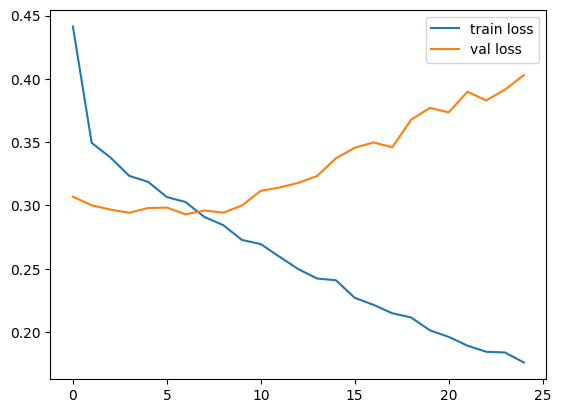

In [ ]:
# todo: plot the train and validation loss by epoch
# plot loss in each epoch
plt.plot(train_loss_arr, label='train loss')
plt.plot(val_loss_arr, label='val loss')
plt.legend()
plt.show()

<div>
<font face="XB Zar" size=5>
</font>
<font size=3>
Draw the f1 score graph based on epoch for train and validation data.
    </font>
</div>

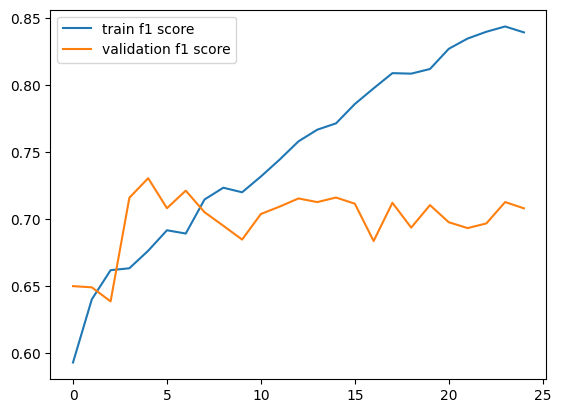

In [ ]:
# todo: plot the f1 score by epoch 
# plot accuracy in each epoch
plt.plot(train_f1_macro_scores, label='train f1 score')
plt.plot(val_f1_macro_scores , label = 'validation f1 score')
plt.legend()
plt.show()

<div>
<font size=5>
    <h2>
    <b>
    Evaluate model
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
     <br>
Now give the test data to your model and get the following based on the outputs.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [ ]:
# todo: evaluate the model on the test set
# print the required metrics
model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(best_model, criterion, test_loader, test_mode=True)


Test | Loss:3.37e-01 | f1_score: 0.71|: 100%|██████████| 1/1 [00:00<00:00,  6.04batch/s]


In [ ]:
# compute accuracy
acc = (predicted_labels == true_labels).sum().item() / len(true_labels)
f1_score_micro = f1_score(true_labels, predicted_labels, average='micro')
f1_score_macro = f1_score(true_labels, predicted_labels, average='macro')
recall_score_macro = recall_score(true_labels, predicted_labels, average='macro')
recall_score_micro = recall_score(true_labels, predicted_labels, average='micro')
precision_score_macro = precision_score(true_labels, predicted_labels, average='macro')
precision_score_micro = precision_score(true_labels, predicted_labels, average='micro')

print(f'Test | Loss:{eval_loss:.2e} | Acc: {acc:.2f}| F1-Score-Macro: {f1_score_macro:.2f} | F1-Score-Micro: {f1_score_micro:.2f}')
print(f'Test | Recall-Macro: {recall_score_macro:.2f} | Recall-Micro: {recall_score_micro:.2f}')
print(f'Test | Precision-Macro: {precision_score_macro:.2f} | Precision-Micro: {precision_score_micro:.2f}')

Test | Loss:3.37e-01 | Acc: 0.87| F1-Score-Macro: 0.71 | F1-Score-Micro: 0.87
Test | Recall-Macro: 0.69 | Recall-Micro: 0.87
Test | Precision-Macro: 0.75 | Precision-Micro: 0.87


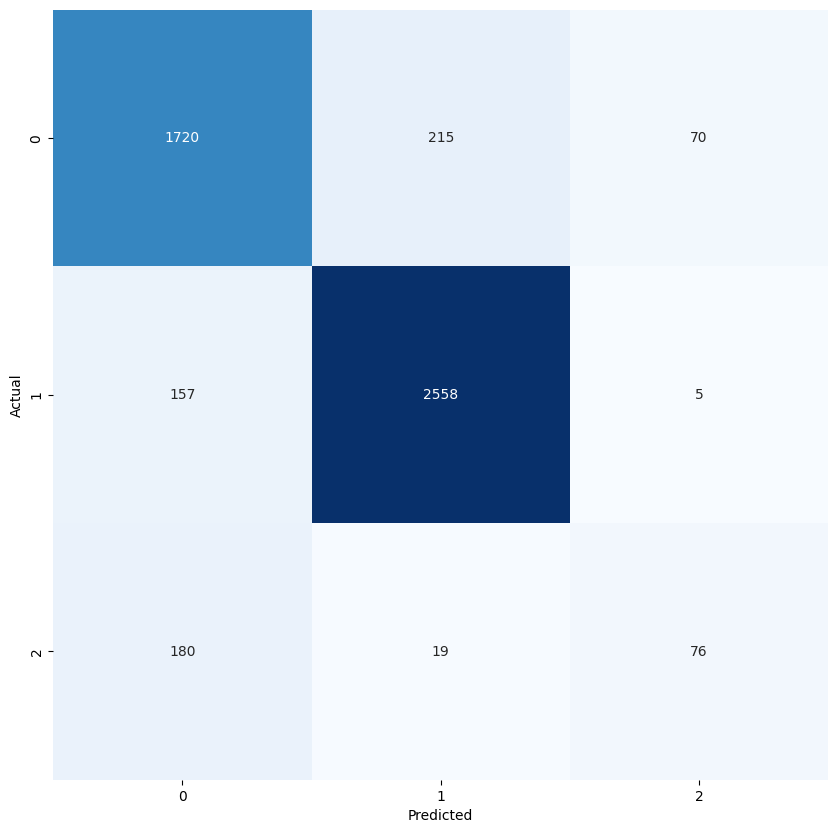

In [ ]:
# confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div>
<font size=3>
     <br>
    Finally, write a function that takes a text as input and gives the appropriate label based on your model.
    <br>
    <br>
    </font>
</div>
    

In [ ]:
def predict(x):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    # todo
    
    # get the emmbeding of the query
    x = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer)
    # convert the query to a tensor
    x = torch.tensor(x)
    # add a batch dimension
    x = x.unsqueeze(0)
    # move the query to the device
    x = x.to(device)
    # get the output of the model
    out = model(x)
    # get the predicted class
    predicted_class = torch.argmax(out, dim=1)
    # convert the predicted class to a real string
    predicted_class = unique_labels[predicted_class]

    return predicted_class

In [ ]:
predict('hardware and computerc architecture is good')

In [ ]:
PATH = "nn_fasttext_model.pt"

# Save
torch.save(model, PATH)

<div>
<font size=5>
    <h1>
    <b>
    Classification using language models
    </b>
    </h1>
    <p></p>
    <p></p>
</font>
<font size=3>
In this section, we are going to use pre-trained language models and fine-tune them to create our classifier.
</font>
</div>
   

## Requirements

In [ ]:
import torch
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
# from transformers import BertTokenizerFast, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<div >
<font size=5>
     <h2>
     <b>
Read and preprocess data
     </b>
     </h2>
     <p></p>
     <p></p>
</font>
<font size=3>
     <br>
     First, load the data. Clean it or, in other words, perform appropriate EDA so that the data does not have null data or the like. Perform the necessary preprocessing on the data that you are familiar with in the previous phase.
Consider the first label of each article as the category of that article from the dataset.
</font>
</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
# read data
df = pd.read_csv('./drive/MyDrive/arxiv_data.csv')
df = df.sample(n=10000, random_state=1)

In [ ]:
# perform data cleaning and eda (you can add cells here)
df

,titles,summaries,terms
931,Self-Learning to Detect and Segment Cysts in L...,Image segmentation is a fundamental problem in...,['cs.CV']
40820,Online trajectory recovery from offline handwr...,"In general, it is straightforward to render an...","['cs.CV', 'cs.LG']"
8930,SpotPatch: Parameter-Efficient Transfer Learni...,Deep learning based object detectors are commo...,['cs.CV']
46601,Understanding the role of importance weighting...,"The recent paper by Byrd & Lipton (2019), base...",['cs.LG']
13852,Towards Differentiable Resampling,Resampling is a key component of sample-based ...,"['cs.LG', 'cs.RO', 'stat.ML']"
...,...,...,...
35901,UCB Exploration via Q-Ensembles,We show how an ensemble of $Q^*$-functions can...,"['cs.LG', 'stat.ML']"
10542,Sparsifying the Update Step in Graph Neural Ne...,"Message-Passing Neural Networks (MPNNs), the m...","['cs.LG', 'cs.AI', 'cs.SI']"
43910,SARN: Relational Reasoning through Sequential ...,This paper proposes an attention module augmen...,"['cs.LG', 'stat.ML']"
15105,SWAGAN: A Style-based Wavelet-driven Generativ...,"In recent years, considerable progress has bee...","['cs.CV', 'eess.IV']"


In [ ]:
# replace Nan with empty string
df = df.fillna("")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 931 to 8449
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     10000 non-null  object
 1   summaries  10000 non-null  object
 2   terms      10000 non-null  object
dtypes: object(3)
memory usage: 312.5+ KB


In [51]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return ' '.join(normalized_tokens)

In [52]:
# preprocess text
df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
preprocessed_total = df['preprocessed_abstract'] + df['preprocessed_title']
# use only first label from the list of labels in column 'terms'
df['terms'] = df['terms'].apply(lambda x: x.split(',')[0].split('[')[1].split(']')[0])

In [53]:
# make the labels as integers in a y list
y = df['terms'].tolist()
# find the unique labels
unique_labels = list(set(y))
print(unique_labels)
# map the labels to the numbers from 1 to the labels count
y = [unique_labels.index(i) for i in y]
y = np.array(y)

["'cs.CV'", "'cs.LG'", "'stat.ML'"]



<div >
<font size=5>
    <h2>
    <b>
    Prepare data for model
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
        In this section, prepare labels and texts for the model.
        For the text, consider both the title and the abstract and concatenate the two.
        Randomly select 10000 data for training.
        Also, separate the data.
        In this section, it is enough to divide the data into two categories of training and testing. Put 80% of the data for training and 20% for testing.
    </font>
</div>

In [ ]:
#split preprocessed_total to train and validation also targets are y
X_train, X_test, y_train, y_test = train_test_split(preprocessed_total, y, test_size=0.2, random_state=1)

<div>
<font size=5>
    <h2>
    <b>
    Transformer based classification
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
     <br>
    translate to english:
    The model we use in this section is the famous bert model.
    For this purpose, we use the transformers library.
    Load the relevant model and tokenizer.
    <br><b><u>
    Using the data from the previous section and using the Trainer related to the transformers library, perform the fine-tune operation.
    <br>
    Also, freeze the bert model weights once and only train the relevant classifier.
    </u></b><br>
    Further study of the transformers library is highly recommended.
    </font>
</div>

In [ ]:
MODEL_NAME = "bert-base-uncased"
tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME, do_lower_case=True)

train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=512)
valid_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=512)

In [ ]:
# todo
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(valid_encodings, y_test)

In [14]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(unique_labels)).to("cuda")
model_2 = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(unique_labels)).to("cuda")
model_2.bert.requires_grad_(False)

In [ ]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  f1_score_micro = f1_score(labels, preds, average='micro')
  f1_score_macro = f1_score(labels, preds, average='macro')
  recall_score_macro = recall_score(labels, preds, average='macro')
  recall_score_micro = recall_score(labels, preds, average='micro')
  precision_score_macro = precision_score(labels, preds, average='macro')
  precision_score_micro = precision_score(labels, preds, average='micro')
  return {
      'Accuracy ': f1_score_micro,
      'F1 Score macro' : f1_score_macro,
      'Recall micro' : recall_score_micro,
      'Recall macro' : recall_score_macro,      
      'Precision micro' : precision_score_micro,
      'Precision macro' : precision_score_macro,      
  }

In [ ]:
# i filled this args with help of https://www.thepythoncode.com/article/finetuning-bert-using-huggingface-transformers-python
training_args = TrainingArguments(
    output_dir='./results',   
    num_train_epochs=1,           
    per_device_train_batch_size=8,  
    per_device_eval_batch_size=20,   
    warmup_steps=500,                
    weight_decay=0.01,              
    logging_dir='./logs',            
    load_best_model_at_end=True,    
    logging_steps=400,              
    save_steps=400,
    evaluation_strategy="steps",
)

In [ ]:
# i filled this args with help of https://www.thepythoncode.com/article/finetuning-bert-using-huggingface-transformers-python
training_args2 = TrainingArguments(
    output_dir='./results',   
    num_train_epochs=1,           
    per_device_train_batch_size=8,  
    per_device_eval_batch_size=20,   
    warmup_steps=500,                
    weight_decay=0.01,              
    logging_dir='./logs',            
    load_best_model_at_end=True,    
    logging_steps=400,              
    save_steps=400,
    evaluation_strategy="steps",
)

In [ ]:
trainer1 = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [ ]:
trainer2 = Trainer(
    model=model_2,                         # the instantiated Transformers model to be trained
    args=training_args2,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [ ]:
trainer1.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,F1 score macro,Recall micro,Recall macro,Precision micro,Precision macro
400,0.348600,0.605645,0.851000,0.613961,0.851000,0.619920,0.851000,0.852722


Step,Training Loss,Validation Loss,Accuracy,F1 score macro,Recall micro,Recall macro,Precision micro,Precision macro
400,0.348600,0.605645,0.851000,0.613961,0.851000,0.619920,0.851000,0.852722
800,0.465000,0.487442,0.861000,0.600500,0.861000,0.616523,0.861000,0.906038


TrainOutput(global_step=1000, training_loss=0.4055768890380859, metrics={'train_runtime': 785.8705, 'train_samples_per_second': 10.18, 'train_steps_per_second': 1.272, 'total_flos': 1850016218400000.0, 'train_loss': 0.4055768890380859, 'epoch': 1.0})

In [ ]:
trainer2.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,F1 score macro,Recall micro,Recall macro,Precision micro,Precision macro
400,0.970800,0.866525,0.531500,0.231364,0.531500,0.333333,0.531500,0.177167
800,0.848700,0.858161,0.561000,0.293310,0.561000,0.359442,0.561000,0.416941


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=1000, training_loss=0.8978358306884766, metrics={'train_runtime': 357.3893, 'train_samples_per_second': 22.385, 'train_steps_per_second': 2.798, 'total_flos': 1850016218400000.0, 'train_loss': 0.8978358306884766, 'epoch': 1.0})

<div>
<font size=5>
    <h2>
    <b>
    Evaluate model
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
     <br>
    Now give the test data to your model and get the following based on the outputs.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

In [ ]:
trainer1.evaluate()

{'eval_loss': 0.4874418079853058,
 'eval_Accuracy ': 0.861,
 'eval_F1 Score macro': 0.600500341041189,
 'eval_Recall micro': 0.861,
 'eval_Recall macro': 0.6165233396304698,
 'eval_Precision micro': 0.861,
 'eval_Precision macro': 0.906038465240127,
 'eval_runtime': 46.4278,
 'eval_samples_per_second': 43.078,
 'eval_steps_per_second': 2.154,
 'epoch': 1.0}

In [ ]:
trainer2.evaluate()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.8581607937812805,
 'eval_Accuracy ': 0.561,
 'eval_F1 Score macro': 0.29330956825400056,
 'eval_Recall micro': 0.561,
 'eval_Recall macro': 0.35944195396614737,
 'eval_Precision micro': 0.561,
 'eval_Precision macro': 0.41694121092320086,
 'eval_runtime': 46.224,
 'eval_samples_per_second': 43.268,
 'eval_steps_per_second': 2.163,
 'epoch': 1.0}

<div>
<font size=3>
     <br>
    Compare the results obtained for the two trained models and then compare the results of the better model with the outputs of fasttext that you extracted in the previous section and write your analysis.
    <br>
    </font>
</div>

<div>
<font face="XB Zar" size=3>
     <br>
    Finally, write a function that takes a text as input and gives the appropriate label based on your model.
    <br>
    <br>
    </font>
</div>
    

In [ ]:
def predict(x, model):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    # prepare our text into tokenized sequence
    inputs = tokenizer(x, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    return unique_labels[probs.argmax()]

In [ ]:
predict('hardware is very good.', model)

"'cs.LG'"

In [ ]:
# It is highly recommended to save your final models
# saving the fine tuned model & tokenizer
model_path = "./drive/MyDrive/MIR-bert-base-uncased"
model_path2 = "./drive/MyDrive/MIR2-bert-base-uncased"
model.save_pretrained(model_path)
model_2.save_pretrained(model_path2)
tokenizer.save_pretrained(model_path)

('./drive/MyDrive/MIR-bert-base-uncased/tokenizer_config.json',
 './drive/MyDrive/MIR-bert-base-uncased/special_tokens_map.json',
 './drive/MyDrive/MIR-bert-base-uncased/vocab.txt',
 './drive/MyDrive/MIR-bert-base-uncased/added_tokens.json',
 './drive/MyDrive/MIR-bert-base-uncased/tokenizer.json')

<div>
<font size=6>
    <h1>
    <b>
    Clustering
    </b>
    </h1>
    <p></p>
    <p></p>
</font>
<font size=3>
In this section, you will cluster documents and use these clusters for various purposes. To do this, first generate an embedding vector for each document and create clusters using two algorithms, kmeans and hierarchical clustering.

</font>
</div>

<div >
<font  size=5>
    <h2>
    <b>
Document embedding vector extraction
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
Although it is possible to create an embedding vector for each document using the Bag of Words method, in order to possibly achieve better results in clustering, in this section, you use transformer-based language models to extract these vectors.
For this purpose, you can use
<a href="https://huggingface.co/">HuggingFace</a>
  and the various models available in it.
  <br>
  Implement the required implementation in the extract_embedding function. This function receives a list of documents as input and returns a list of embedding vectors corresponding to each element in the input as output.
  <br>
There are different methods to calculate the embedding vector of each document. Using the CLS token embedding vector in the BERT model, averaging (weighted or unweighted) the embedding vectors of each input word, etc. are available methods that you can choose as you wish.

</font>
</div>

In [12]:
from typing import List
from transformers import BertModel, BertTokenizerFast
def extract_embedding(doc_list : List):
    """Extracts embedding vector for each document in doc_list

    Parameters
    ----------
    doc_list : List
        A list of documents

    Returns
    -------
    list
        A list of embedding vectors
    """
    MODEL_NAME = "bert-base-uncased"
    model= BertModel.from_pretrained(MODEL_NAME).to(device)
    tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME, do_lower_case=True)
    embeddings = []
    with torch.no_grad():
      for document in doc_list:
          inputs = tokenizer(document, padding=True, truncation=True, max_length=512, return_tensors="pt").to("cuda")
          outputs = model(**inputs,output_hidden_states = True)

          embeddings.append(outputs.hidden_states[-1][0,0,:].detach().cpu().numpy())
      



    # Extract a vector for each input document using a transformer-based language model

    
    return embeddings

In [ ]:
# save embeddings 
np.save('./drive/MyDrive/docs_embedding.npy', docs_embedding)

In [4]:
docs_embedding = np.load('./drive/MyDrive/docs_embedding.npy')

<div >
<font size=5>
    <h2>
    <b>
    Dimensionality reduction to visualize clusters
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
In order to be able to see the results of clustering in the next steps, in this section, you will implement the dimensionality reduction function using the T-SNE method.
To do this, you implement the convert_to_2d_tsne function, which receives a list of embedding vectors as input and produces a list of embedding vectors reduced to two dimensions as output. You can use ready-made libraries to implement this function.
Note that the output vectors of this section are used <u>only for plotting</u> and all the steps you take in the following (except plotting) must be done using the <u>non-reduced</u> embedding vectors.
</font>
</div>

In [7]:
from typing import List
from sklearn.manifold import TSNE

def convert_to_2d_tsne(emb_vecs : List):
    """Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """

    # Convert each input vector to 2d vector 
    tsne = TSNE(n_components=2)
    embeddings_2d = tsne.fit_transform(emb_vecs)
    
    return embeddings_2d

# docs_embedding_2d = convert_to_2d_tsne(docs_embedding)

<div>
<font size=5>
    <h2>
    <b>
    Plotting
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
In this section, implement the plot_docs function, which receives a list of reduced-dimension vectors and a list of cluster numbers for each vector (for coloring points) as input and plots a two-dimensional graph in which a separate color is assigned to each cluster and each document is shown as a point colored according to the cluster assigned to it.
</font>
</div>



In [9]:
## ؟ points

from typing import List

import matplotlib.pyplot as plt

def plot_docs(emb_vecs_2d: List, labels : List):
    
    # Plot each document in a 2d space
    plt.scatter(emb_vecs_2d[:,0], emb_vecs_2d[:,1], c=labels)
    plt.show()


<div>
<font size=5>
    <h2>
    <b>
    clustering using Kmeans
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
In this section, you will cluster documents using embedding vectors extracted from a language model using two methods, Kmeans and hierarchical clustering.

</font>
</div>

<div >
<font size=4>
    <h3>
    <b>K-means</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font size=3>
In this section, you first implement the K-means clustering algorithm <u><b>from scratch</b></u> and then use it to create document clusters. Run the algorithm using several different values of the number of clusters (k). In each run, determine the topic of each cluster using some of the documents in each cluster and draw the resulting clustering using the two-dimensional vectors from the previous section. By doing this, investigate your implementation and the performance of this algorithm in clustering documents and placing similar documents in the same clusters.
<br>
Draw the silhouette score chart for different values of k and perform silhouette analysis to select the appropriate k.
Also, using labeled data, draw the purity value for k and report the purity value for the final k.
<br>

</font>
</div>

In [19]:
## ؟ points

from typing import List

def cluster_kmeans(emb_vecs : List, n_clusters : int):
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    # TODO: Implement K-means method 
    
    # choose k vec from emb vec as centers randomly

    centers_idx = np.random.choice(len(emb_vecs), n_clusters, replace=False)
    centers =  emb_vecs[centers_idx]



    itr = 100
    for i in range(itr):
        cluster_centers = []
        cluster_kmeanS = []

        # assign each vector to its closest cluster center

        for vec in emb_vecs:
            cluster_kmeanS.append(np.argmin(np.linalg.norm(vec - centers, axis=1)))
        # update cluster centers based on the new assignment

        for i in range(n_clusters):
            # find all vectors in cluster i
            cluster_i = np.array([emb_vecs[j] for j in range(len(emb_vecs)) if cluster_kmeanS[j] == i])
            # update cluster center
            cluster_centers.append(np.mean(cluster_i, axis=0))

        centers = cluster_centers

    return cluster_centers, cluster_kmeanS

In [42]:
K_list = [2, 3, 4, 5, 6 , 7]
cluster_centers_list = []
cluster_kmeans_list = []
for k in K_list:
    cluster_centers, cluster_kmeanS = cluster_kmeans(docs_embedding, k)
    cluster_centers_list.append(cluster_centers)
    cluster_kmeans_list.append(cluster_kmeanS)

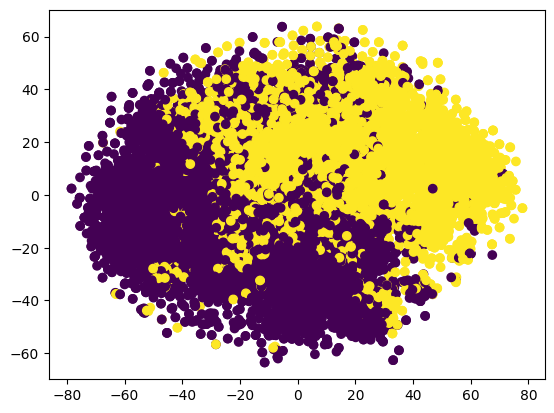

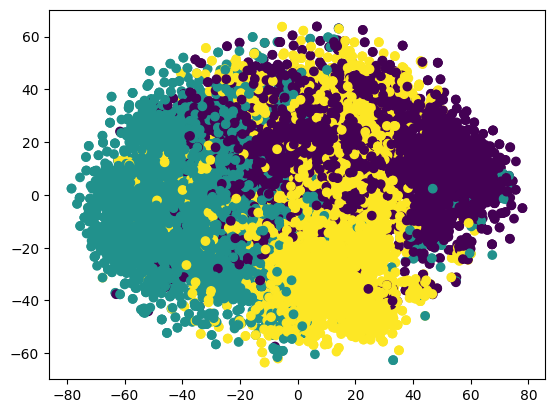

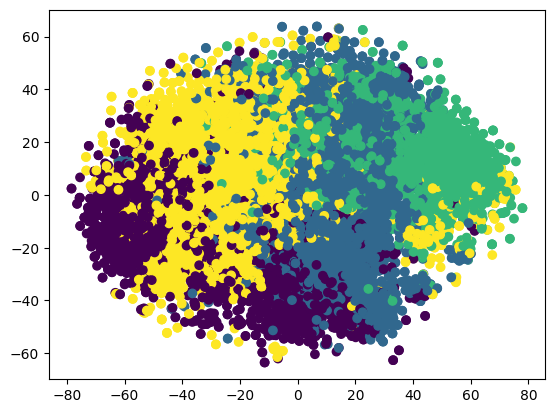

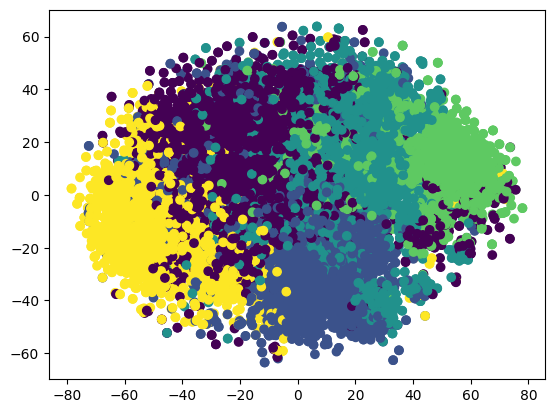

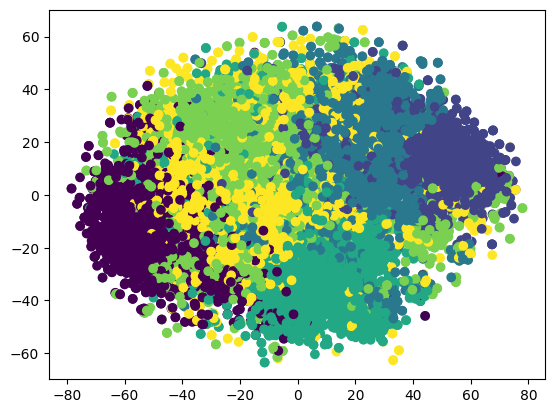

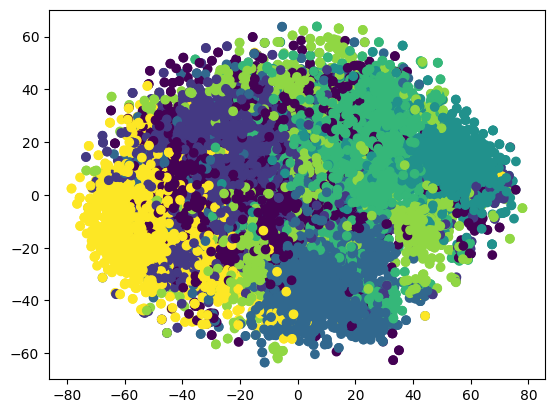

In [44]:
# plot the results
for i in range(len(K_list)):
    plot_docs(docs_embedding_2d, cluster_kmeans_list[i])

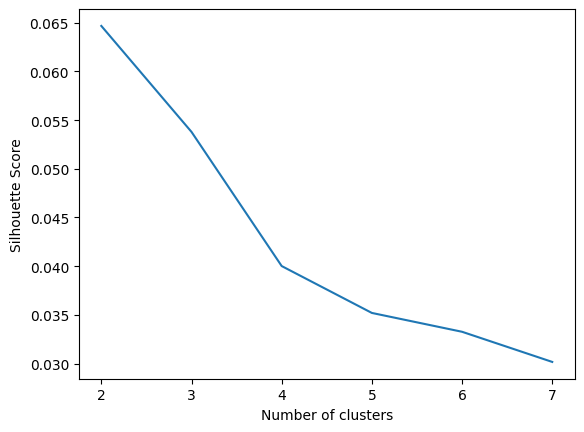

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score
#TODO: silhouette analysis 

# compute silhouette score for each k

silhouette_scores = []
for i in range(len(K_list)):
    silhouette_scores.append(silhouette_score(docs_embedding, cluster_kmeans_list[i]))

# plot silhouette score for each k

plt.plot(K_list, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
#TODO: plot purity for different value of k

from typing import List
from sklearn import metrics

def purity_score(y_true : List, y_pred : List):

    # compute purity score
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

purity_score(labels, cluster_kmeans)


# plot the purity score for different value of k
purity_score_list = []
for i in range(len(K_list)):
    purity_score_list.append(purity_score(labels, cluster_kmeans_list[i]))

plt.plot(K_list, purity_score_list)
plt.show()

# the labels was deleted from my memory so i couldent run this secttion


In [57]:
# find closest doc to each centroid 

def find_closest_doc_to_centroid(emb_vecs : List, cluster_centers : List):

    closest_docs = []
    for center in cluster_centers:
        closest_docs.append(np.argmin(np.linalg.norm(emb_vecs - center, axis=1)))

    return closest_docs

# get title of this doc 

def get_title(doc_id : int):
    return df.iloc[doc_id]['titles']

In [58]:
# print each center target title

for i in range(len(cluster_centers_list)):
    print('cluster center: ', i)
    for doc_id in find_closest_doc_to_centroid(docs_embedding, cluster_centers_list[i]):
        print(get_title(doc_id))
    print('-------------------------')


cluster center:  0
Binary Constrained Deep Hashing Network for Image Retrieval without Manual Annotation
Video Salient Object Detection via Adaptive Local-Global Refinement
-------------------------
cluster center:  1
Video Salient Object Detection via Adaptive Local-Global Refinement
MSFNet:Multi-scale features network for monocular depth estimation
Self-learn to Explain Siamese Networks Robustly
-------------------------
cluster center:  2
Binary Constrained Deep Hashing Network for Image Retrieval without Manual Annotation
Generating Multi-type Temporal Sequences to Mitigate Class-imbalanced Problem
MoET: Mixture of Expert Trees and its Application to Verifiable Reinforcement Learning
Efficient Self-supervised Vision Transformers for Representation Learning
-------------------------
cluster center:  3
Richer and Deeper Supervision Network for Salient Object Detection
Self-learn to Explain Siamese Networks Robustly
Learning Robust Visual-Semantic Embeddings
Learn to Augment: Joint Da

<div>
<font size=4>
    <h3>
    <b>(Hierarchical Clustering)</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font size=3>
Hierarchical clustering is one of the clustering techniques in machine learning. In this section, you can use the scipy library or any other library in Python to cluster the data hierarchically. Then you can view the clusters with matplotlib.
</font>
</div>

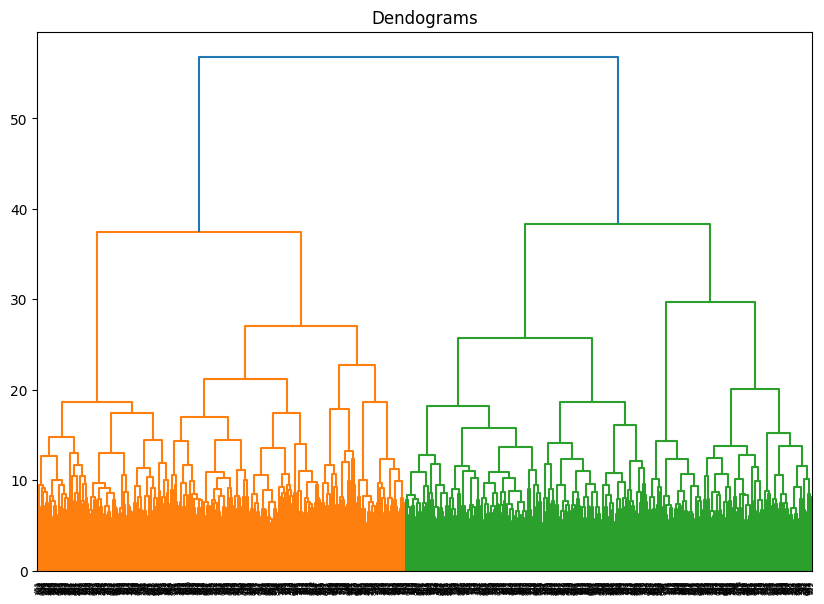

In [8]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt


# cluster the docs with shc

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(docs_embedding[0:1000], method='ward'))
plt.show()


<div>
<font size=5>
    <h2>
    <b>
    Clustering the outputs of the phase 1 search system
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
In this section, you will add clustering capability to the search system you developed in phase 1 of the course. To do this, you will add the functions you have implemented so far to the phase 1 search system in a way that clusters the output documents of the system and specifies the documents that are in a cluster in the output display. You can do this by calling the functions you implemented in phase 1 and making changes to them in the cell below. The implementation of this section is up to you.
</font>
</div>

<ipython-input-21-9574094c7e4d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  docs['title_abstract'] = docs['title'] + ' ' + docs['anstract']
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTrainin

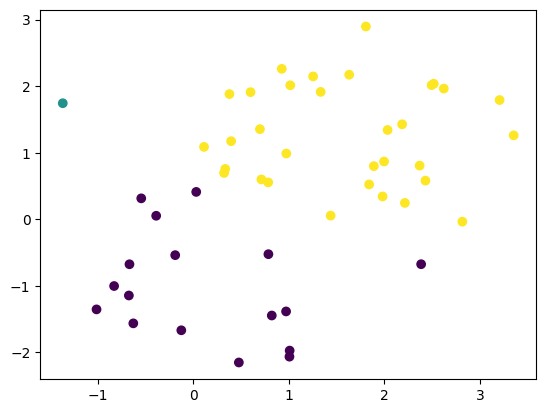

In [21]:
import phase1
import pandas as pd
import numpy as np

docs_paper_id = phase1.search("Super-resolution microscopy and fluorescent probes","Super-resolution microscopy and fluorescent probes",50,"ltn-lnc",0.5)

# get docs from paper_id
data = pd.read_csv("./tokenized_data.csv")
data = data.fillna("")
docs = data[data['paperId'].isin(docs_paper_id)]

# merge columns title and abstract
docs['title_abstract'] = docs['title'] + ' ' + docs['anstract']

# get embeddings for each doc
phase1_docs_embedding = extract_embedding(docs['title_abstract'].tolist())
phase1_docs_embedding = np.array(phase1_docs_embedding) 

# convert each embedding to 2d vector
phase1_docs_embedding_2d = convert_to_2d_tsne(phase1_docs_embedding)

# cluster the docs with kmeans and plot the results
cluster_centers, cluster_kmeans = cluster_kmeans(phase1_docs_embedding, 3)
plot_docs(phase1_docs_embedding_2d, cluster_kmeans)


<div>
<font size=5>
    <h2>
    <b>
    search for similar documents to a document
    </b>
    </h2>
    <p></p>
    <p></p>
</font>
<font size=3>
In this section, you will implement the find_similar_docs function, which receives the index of a document in the dataset, the number of similar documents desired, and a list of embedding vectors, and produces the indices of similar documents in the dataset as output. To do this, find the num_of_similar_docs closest vectors to the desired vector and return their indices as output. Similar documents should be sorted by similarity (the similarity value of their embedding vector to the input document's embedding vector). The choice of similarity criterion is up to you.
</font>
</div>

In [67]:
## ؟ points

from typing import List
import heapq

def find_similar_docs(input_doc_index : int,
                      num_of_similar_docs: int,
                      emb_vecs : List):
    """Finds similar documents to input in dataset

    Parameters
    ----------
    input_doc_index: int
        Index of input document vector in emb_vecs list to search for specific paper

    num_of_similar_docs:
        Number of similar documents to return 

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to input document
    """

    # TODO: Implement a function to find similar documents to input document.
    vec = docs_embedding[input_doc_index]

    # build a heap with size num_of_similar_docs
    heap = []
    for i in range(len(emb_vecs)):
        if i == input_doc_index:
            continue
        heapq.heappush(heap, (np.linalg.norm(vec - docs_embedding[i]), i))

    # extract the best k min
    index_list = []
    for i in range(num_of_similar_docs):
        index_list.append(heapq.heappop(heap)[1])


    return index_list




print(find_similar_docs(5, 5, docs_embedding))

[652, 894, 8572, 8178, 5801]
